In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds
from tensorflow.keras.models import Model

import seaborn as sns

import pandas as pd
import matplotlib.pyplot as plt


time: 1.87 s (started: 2021-05-25 23:04:47 +00:00)


In [ ]:
# from tensorflow.keras import mixed_precision

# policy = mixed_precision.Policy('mixed_float16')
# mixed_precision.set_global_policy(policy)

time: 1.51 ms (started: 2021-05-25 23:04:49 +00:00)


In [ ]:
(ds_train, ds_val, ds_test), ds_info = tfds.load(
    'cifar10',
    data_dir = "/content/drive/MyDrive/Colab Notebooks/Datasets/TensorflowDatasets",
    split=['train[:80%]', 'train[80%:]', 'test'],
    
    with_info=True,
    as_supervised=True
)


time: 657 ms (started: 2021-05-25 23:04:49 +00:00)


In [ ]:
print(ds_info)

tfds.core.DatasetInfo(
    name='cifar10',
    version=3.0.2,
    description='The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.',
    homepage='https://www.cs.toronto.edu/~kriz/cifar.html',
    features=FeaturesDict({
        'id': Text(shape=(), dtype=tf.string),
        'image': Image(shape=(32, 32, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=60000,
    splits={
        'test': 10000,
        'train': 50000,
    },
    supervised_keys=('image', 'label'),
    citation="""@TECHREPORT{Krizhevsky09learningmultiple,
        author = {Alex Krizhevsky},
        title = {Learning multiple layers of features from tiny images},
        institution = {},
        year = {2009}
    }""",
    redistribution_info=,
)

time: 1.62 ms (started: 2021-05-25 23:04:49 +00:00)


In [ ]:
print(type(ds_train))

<class 'tensorflow.python.data.ops.dataset_ops.PrefetchDataset'>
time: 1.34 ms (started: 2021-05-25 23:04:49 +00:00)


In [ ]:
# get_label_name = ds_info.features['label'].int2str

# image, label = next(iter(ds_train))
# _ = plt.imshow(image)
# _ = plt.title(get_label_name(label))

time: 937 µs (started: 2021-05-25 23:04:49 +00:00)


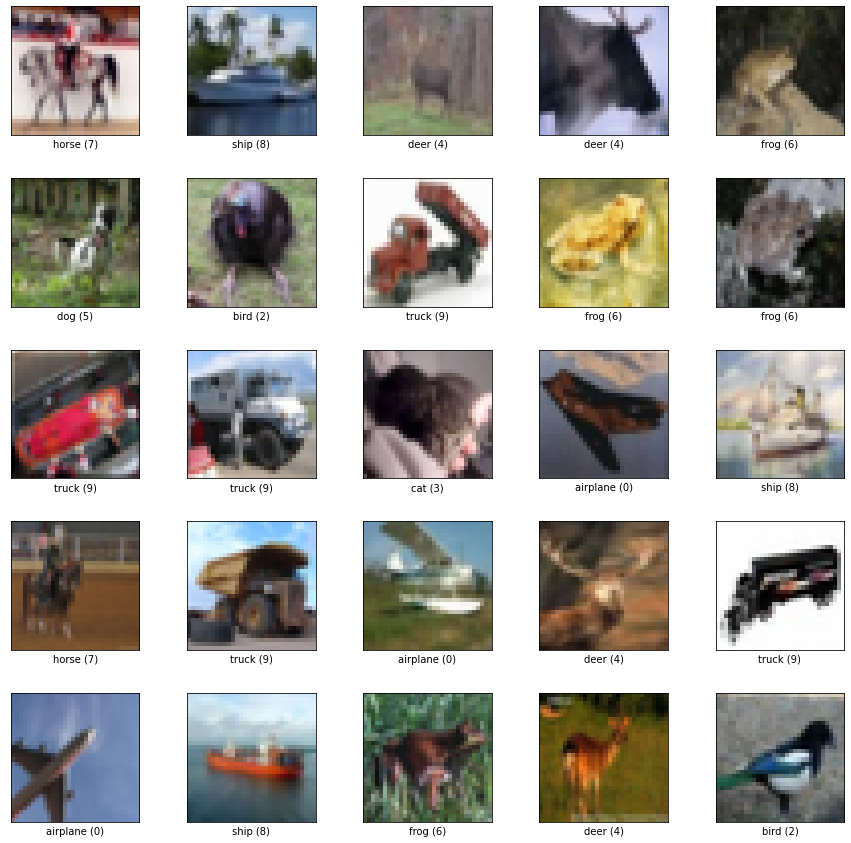

time: 1.07 s (started: 2021-05-25 23:04:49 +00:00)


In [ ]:
fig = tfds.show_examples(ds_train, ds_info, rows = 5, cols = 5)

In [ ]:
img_height = img_width = 32

print(img_height)
print(img_width)


AUTOTUNE = tf.data.AUTOTUNE
BATCH_SIZE = 64







32
32
time: 6.86 ms (started: 2021-05-25 23:04:50 +00:00)


In [ ]:
def downscale_img(image, label):
  image = tf.image.resize(image, [img_height, img_width])
  # image = tf.reshape(-1,img_height*img_width)
  return image, label



ds_train = ds_train.map(downscale_img, num_parallel_calls=AUTOTUNE)
ds_val = ds_val.map(downscale_img, num_parallel_calls=AUTOTUNE)
ds_test = ds_test.map(downscale_img, num_parallel_calls=AUTOTUNE)


time: 104 ms (started: 2021-05-25 23:04:50 +00:00)


In [ ]:
def normalize_img(image, label):
    return tf.cast(image, tf.float32) / 255.0, label

def configure_for_performance(ds):
    ds = ds.map(normalize_img, num_parallel_calls = AUTOTUNE)
    # ds = ds.cache("Cache")
    ds = ds.shuffle(buffer_size=256)
    ds = ds.batch(BATCH_SIZE)
    ds = ds.prefetch(buffer_size=AUTOTUNE)
    return ds

# def configure_for_performance_2(ds):
#     ds = ds.map(normalize_img, num_parallel_calls = AUTOTUNE)
#     ds = ds.cache("Cache")
#     ds = ds.shuffle(buffer_size=256)
#     ds = ds.batch(BATCH_SIZE)
#     ds = ds.prefetch(buffer_size=AUTOTUNE)
#     return ds

def configure_for_performance_3(ds):
    ds = ds.map(normalize_img, num_parallel_calls = AUTOTUNE)
    ds = ds.batch(BATCH_SIZE)
    ds = ds.prefetch(buffer_size=AUTOTUNE)
    return ds

time: 20.9 ms (started: 2021-05-25 23:04:51 +00:00)


In [ ]:
ds_train = configure_for_performance(ds_train)
ds_val = configure_for_performance_3(ds_val)
ds_test = configure_for_performance_3(ds_test)


time: 55.5 ms (started: 2021-05-25 23:04:51 +00:00)


In [ ]:
for image, label in ds_train.take(1):
  print("Image shape: ", image.numpy().shape)
  print("Label: ", label.numpy())

for image, label in ds_val.take(1):
  print("Image shape: ", image.numpy().shape)
  print("Label: ", label.numpy())
    
for image, label in ds_test.take(1):
  print("Image shape: ", image.numpy().shape)
  print("Label: ", label.numpy())


Image shape:  (64, 32, 32, 3)
Label:  [3 1 9 3 4 3 5 8 2 3 9 5 5 8 7 0 1 3 3 8 7 5 4 6 8 2 6 9 3 9 4 7 6 9 5 3 0
 5 8 3 7 2 5 9 9 5 2 4 8 5 7 5 7 7 3 2 0 7 6 8 0 8 3 5]
Image shape:  (64, 32, 32, 3)
Label:  [4 0 4 7 6 6 6 0 2 8 4 0 8 7 9 5 5 0 1 6 5 6 6 6 2 8 8 3 1 3 2 7 5 5 1 4 5
 1 2 2 3 1 3 0 0 7 5 1 2 5 8 2 5 8 1 3 7 3 6 4 6 9 2 4]
Image shape:  (64, 32, 32, 3)
Label:  [7 0 6 9 5 1 7 0 3 2 7 2 7 9 6 8 8 8 7 9 4 2 3 5 0 0 2 8 1 8 2 0 7 2 0 0 9
 1 0 5 1 5 0 3 5 0 2 0 5 3 7 4 1 4 2 5 1 5 2 0 7 2 2 1]
time: 385 ms (started: 2021-05-25 23:04:51 +00:00)


In [ ]:
num_classes = ds_info.features["label"].num_classes


# Creating model
model = tf.keras.applications.EfficientNetB0(
    include_top=False, input_shape=(img_height, img_width, 3),
    classes=num_classes, weights=None) #, pooling='avg')


x = model.output

x = layers.GlobalAveragePooling2D()(x)

# output layer
predictions = layers.Dense(num_classes, activation="softmax")(x)

model = Model(inputs = model.input, outputs = predictions)
  
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 32, 32, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 32, 32, 3)    7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 33, 33, 3)    0           normalization[0][0]              
______________________________________________________________________________________________

In [ ]:
from tensorflow.keras.optimizers import Adamax

# Model compilation
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adamax(0.0001),
              metrics=['accuracy'])


# Training model
model_history = model.fit(ds_train,
                          epochs=100,
                          validation_data=ds_val,
                          verbose=1)


path = '/content/drive/MyDrive/Colab Notebooks/Notebooks/Models/EfficientNetB0_Cifar10_Base_NoWeight/'
model.save(path)

Epoch 1/100
625/625 [==============================] - 58s 56ms/step - loss: 2.3648 - accuracy: 0.1498 - val_loss: 2.3746 - val_accuracy: 0.0979
Epoch 2/100
625/625 [==============================] - 28s 45ms/step - loss: 2.2510 - accuracy: 0.1837 - val_loss: 2.3597 - val_accuracy: 0.1928
Epoch 3/100
625/625 [==============================] - 27s 43ms/step - loss: 2.1915 - accuracy: 0.2025 - val_loss: 2.2477 - val_accuracy: 0.2138
Epoch 4/100
625/625 [==============================] - 28s 44ms/step - loss: 2.1418 - accuracy: 0.2162 - val_loss: 2.2061 - val_accuracy: 0.2325
Epoch 5/100
625/625 [==============================] - 27s 43ms/step - loss: 2.1009 - accuracy: 0.2305 - val_loss: 2.1821 - val_accuracy: 0.2477
Epoch 6/100
625/625 [==============================] - 27s 43ms/step - loss: 2.0579 - accuracy: 0.2421 - val_loss: 2.1207 - val_accuracy: 0.2541
Epoch 7/100
625/625 [==============================] - 27s 43ms/step - loss: 2.0229 - accuracy: 0.2569 - val_loss: 2.0700 - val_ac

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Notebooks/Models/EfficientNetB0_Cifar10_Base_NoWeight/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Notebooks/Models/EfficientNetB0_Cifar10_Base_NoWeight/assets


time: 1h 1min 41s (started: 2021-05-25 23:04:52 +00:00)


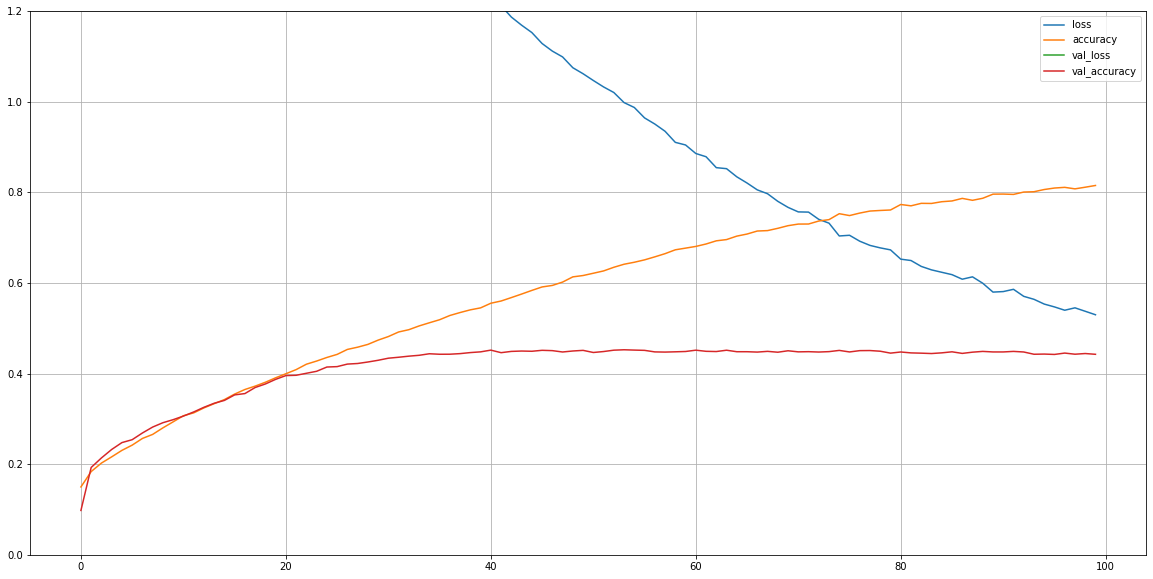

time: 241 ms (started: 2021-05-26 00:06:34 +00:00)


In [ ]:


pd.DataFrame(model_history.history).plot(figsize=(20, 10))
plt.grid(True)
plt.gca().set_ylim(0, 1.2)
plt.show()

In [ ]:
loss_value, acc = model.evaluate(ds_test)

print(f"Test Accuracy: {(acc*100):.3f}%")
print(f"Loss: {loss_value:.3f}%")

157/157 [==============================] - 3s 18ms/step - loss: 2.0972 - accuracy: 0.4529
Test Accuracy: 45.290%
Loss: 2.097%
time: 3.02 s (started: 2021-05-26 00:06:34 +00:00)
